Original features: 13
Feature names: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Feature Importance (Random Forest):
     feature  importance
7    thalach    0.123176
12      thal    0.120980
2         cp    0.119219
11        ca    0.117524
9    oldpeak    0.105544
0        age    0.101294
3   trestbps    0.074835
4       chol    0.072463
8      exang    0.053397
10     slope    0.048968
1        sex    0.031521
6    restecg    0.021432
5        fbs    0.009647


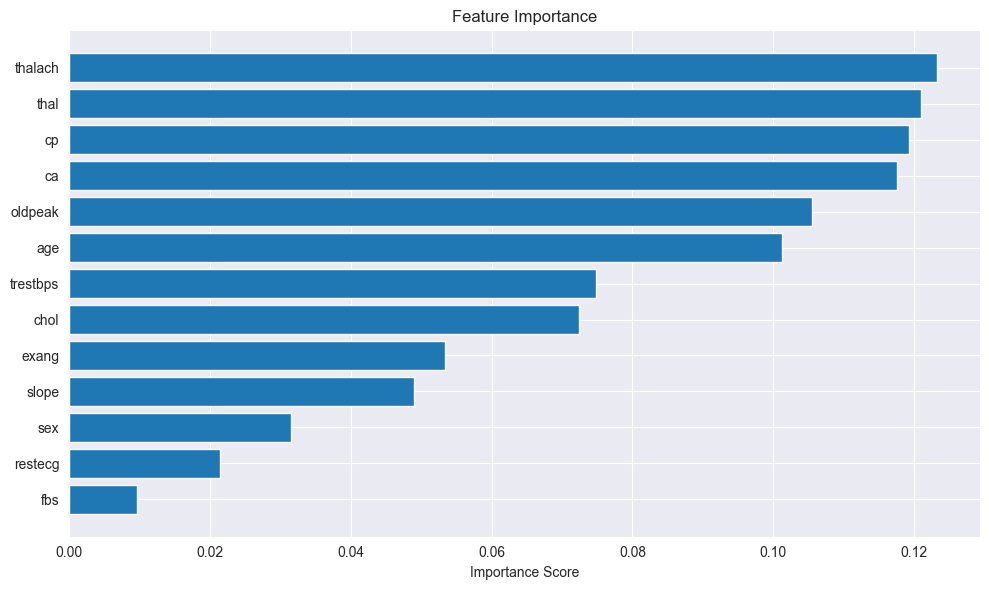


RFE Selected Features (8):
['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']

Chi-Square Selected Features (8):
['sex', 'cp', 'restecg', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Final Selected Features (appear in ≥ 2 methods): 8
['thalach', 'age', 'chol', 'thal', 'ca', 'trestbps', 'cp', 'oldpeak']

Selected features dataset shape: (297, 9)

Selected dataset preview:
    thalach       age      chol  thal   ca  trestbps   cp   oldpeak  target
0  0.017494  0.936181 -0.276443   6.0  0.0  0.750380  1.0  1.068965       0
1 -1.816334  1.378929  0.744555   3.0  3.0  1.596266  4.0  0.381773       1
2 -0.899420  1.378929 -0.353500   7.0  2.0 -0.659431  4.0  1.326662       1
3  1.633010 -1.941680  0.051047   3.0  0.0 -0.095506  3.0  2.099753       0
4  0.978071 -1.498933 -0.835103   3.0  0.0 -0.095506  2.0  0.295874       0

Selected features data saved to ../data/processed/selected_features.csv


In [1]:
# Heart Disease UCI Dataset - Feature Selection
# Notebook 03: Feature Selection & Variable Importance

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, chi2, SelectKBest
from sklearn.preprocessing import MinMaxScaler

# Load cleaned data
df = pd.read_csv('../data/processed/cleaned_data.csv')

# Separate features and target
X = df.drop('target', axis=1)  # All features except target
y = df['target']  # Target only

print("Original features:", X.shape[1])  # number of features (13)
print("Feature names:", X.columns.tolist())

# Method 1: Random Forest Feature Importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance[
    'importance'])  # horizontal bar chart showing feature importance (Longer bars = more important features)
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.gca().invert_yaxis()  # put most important features at the top
plt.tight_layout()
plt.show()

# Method 2: Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf, n_features_to_select=8)
rfe.fit(X, y)

rfe_features = X.columns[rfe.support_]
print(f"\nRFE Selected Features ({len(rfe_features)}):")
print(rfe_features.tolist())

# Method 3: Chi-Square Test (for non-negative features)
# Scale features to be non-negative
scaler = MinMaxScaler()  # MinMaxScaler transforms features to range [0,1]
X_scaled = scaler.fit_transform(X)

chi2_selector = SelectKBest(chi2, k=8)
X_chi2 = chi2_selector.fit_transform(X_scaled, y)

# Chi-square test measures independence between each feature and target
# Higher chi-square score = stronger relationship with target
# Selects top 8 features with the highest chi-square scores
chi2_features = X.columns[chi2_selector.get_support()]
print(f"\nChi-Square Selected Features ({len(chi2_features)}):")
print(chi2_features.tolist())

# Combine methods - select features that appear in at least 2 methods
top_rf_features = feature_importance.head(8)['feature'].tolist()

all_selected = set(top_rf_features) | set(rfe_features) | set(chi2_features)
feature_counts = {}  # dictionary of feature_name, count

for feature in all_selected:
    count = 0
    if feature in top_rf_features:
        count += 1
    if feature in rfe_features:
        count += 1
    if feature in chi2_features:
        count += 1
    feature_counts[feature] = count

# Select features that appear in at least 2 methods
final_features = [f for f, count in feature_counts.items() if count >= 2]

print(f"\nFinal Selected Features (appear in ≥ 2 methods): {len(final_features)}")
print(final_features)

# Create dataset with selected features
X_selected = X[final_features]
df_selected = X_selected.copy()
df_selected['target'] = y

print(f"\nSelected features dataset shape: {df_selected.shape}")
print("\nSelected dataset preview:")
print(df_selected.head())

# Save selected features dataset
df_selected.to_csv('../data/processed/selected_features.csv', index=False)
print("\nSelected features data saved to ../data/processed/selected_features.csv")